In [1]:
import requests
import shapefile
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
url = "http://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/localidades/Shapefile_SHP/BR_Localidades_2010_v1.shp"
r = requests.get(url, allow_redirects=True)
open("BR_Localidades_2010_v1.shp", "wb").write(r.content)

612908

In [3]:
sf = shapefile.Reader("BR_Localidades_2010_v1.shp")

In [4]:
shapes = sf.shapes()

In [5]:
all_cities = [s.points[0] for s in shapes]

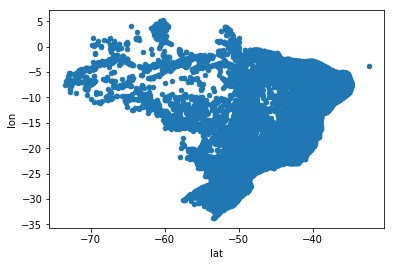

In [6]:
df = DataFrame.from_records(all_cities)
df.columns = ['lat', 'lon']
df.plot.scatter(x = 'lat', y = 'lon')

In [7]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

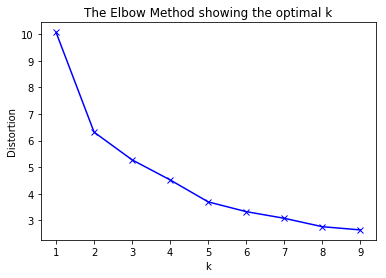

In [8]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

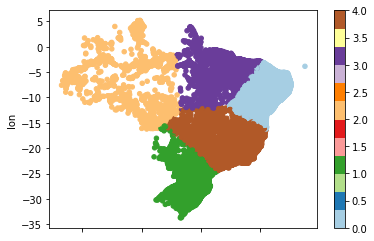

In [9]:
model = KMeans(n_clusters = 5).fit(df)

# Visualize it:
df.plot.scatter(x = 'lat', y = 'lon', c=model.labels_, cmap=plt.cm.Paired)
